# Parcimonie - TP #3

## Antonin GAY

## Introduction

L'objectif de ce TP va être d'étudier différents algorithmes de séparation de sources (BSS Blind Sources Separation), 
en les appliquant sur des mélanges de sources synthétisé ou tirés de données réelles. Ces exemples permettront de 
mettre en valeur l'efficacité et les limites de chacune de ces méthodes.


In [2]:
%matplotlib inline
from TP3.tp3_tests import *

print('Function loaded')


Function loaded


## 1. Preprocessing and PCA

La première étape pour le traitement des données va être d'appliquer un préprocessing à nos données, via une opération 
de whitening. Cette opération a pour objectif de décorreler les dimensions de la matrice X des données. 

Une application visuelle de cet effet est d'appliquer le whitening sur un mixing de deux sources gaussiennes présentant 
une direction privilégiée. Ces deux sources sont donc corrélées entre elles, ce que les algorithmes que nous verrons 
dans la suite n'apprécient pas. On va donc utiliser le whitening pour décoréler ces deux sources, ce qui aura pour effet 
de supprimer la direction privilégiée du mélange. Ceci est visible sur les figures ci-dessous, où deux sources 
gaussiennes correlées sont générées puis décorrélées via le whitening.


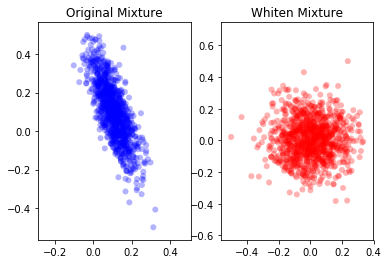

In [2]:
test_whiten()



Une fois les sources décorrélées via le whitening, on peut s'intéresser à un premier algorithme de séparations de 
sources avec le PCA (Principal Components Analysis), qui va estimer les sources d'origines à partir de la mixture, qui 
aura été décorrelée au préalable. Nous réalisons cela sur les figures suivantes.

Dans tous les exemples suivants d'estimation de sources, les sources originales comme estimées sont normalisées (leurs 
valeurs étant mises entre -0.5 et 0.5) avant affichage, car aucun de ces algorithme ne peut assurer de facteur 
d'échelle. En effet, puisque nous essayons de déterminer $A$ et $S$ telles que $X=A*S$, une infinité de $A$ et $S$ 
sont possibles à un facteur multiplicatif près.


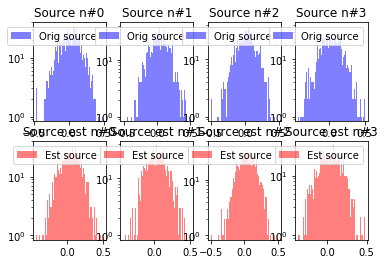

In [3]:
test_pca(nb_sources=4, nb_observ=4)
test_pca(nb_sources=2, nb_observ=2)




Dans ce cas-ci, où le PCA est appliqué sur une mixture de 4 sources gaussiennes, mélangées 4 fois, les résultats sont
convaincants, et l'algorithme arrive à retrouver les sources d'origines, quand bien même elles sont toutes les mêmes.

L'exemple suivant traite le cas où le nombre de mesures est plus grand que celui de sources. On y observe que de la même 
façon, l'algorithme détecte correctement les sources. Cependant, le PCA n'est pas applicable lorsque le nombre 
d'observations est inférieur au nombre de sources à déterminer, et c'est sa limite, puisque il ne sera pas applicable 
dans certaines applications.  


In [4]:
test_pca(nb_sources=4, nb_observ=6)
test_pca(nb_sources=2, nb_observ=4)



Enfin un dernier essai du PCA est réalisé sur des sources qui ne sont pas gaussiennes mais uniformes, présenté sur les 
figures suivantes. On y observe que malheureusmeent, le PCA y trouve des sources gaussiennes malgré tout. L'algorithme 
ne semble donc pas adapté aux sources qui ne seraient pas gaussiennes. Néanmoins, puisque les algorithmes suivants ne 
peuvent être appliqués si plus d'une source a une distribution gaussienne, il pourrait conserver son utilité dans ce 
genre de situations.


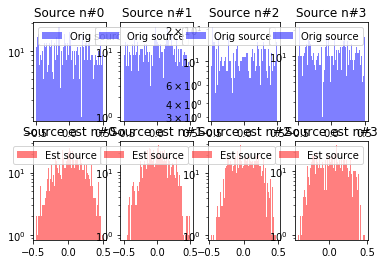

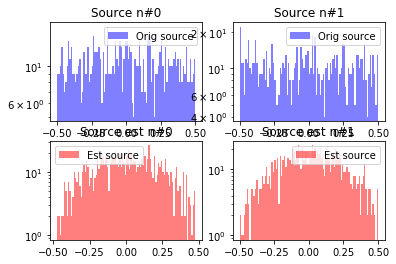

In [5]:
test_pca_unif(nb_sources=4, nb_observ=4)
test_pca_unif(nb_sources=2, nb_observ=2)


## 2. Independant Component Analysis (ICA)



Le prochain algorithme que nous allons tester est l'ICA (Independant Component Analysis), sous sa forme Fast_ICA.

Dans un premier temps, nous le testons sur deux réalisations de mélange de deux sources uniformes, sur lesqelles 
l'algorithme précédent, le PCA, n'arrivait pas à réaliser une estimation. La séparation de source est montrée 
ci-dessous.


Mean squared error between mixing and estimated mixing = 0.000


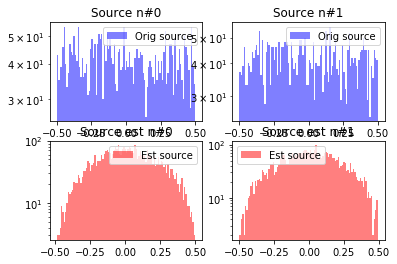

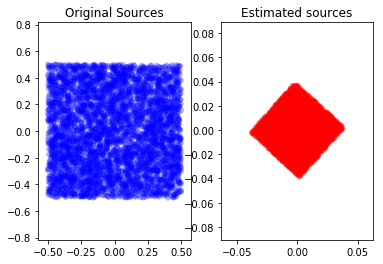

In [6]:
_ = test_fast_ica(cd_a=1)



Ce premier essai, sur des données avec un nombre de conditionnement de 1, présente les mêmes limites que précédemment :
Les directions ne sont pas bien retrouvées et les distributions de chaque sources n'est pas respectée. Les deux sources 
uniformes sont estimées par des sources dont les histogrammes sont plus applatis sur les bords. Néanmoins, les résultats
sont meilleurs que les gaussiennes précédentes, car les fores obtenues sont plus larges, même sans être parfaites.

Nous continuons de tester l'algorithme sur des sources similaires, mais avec un nombre de conditionnement qui varie, de 
1 à 100, cette fois-ci. Les résultats sont visibles sur les igures suivantes. Pour chaque cas, nous calculons le 'mixing
matrix criterion', qui évalue la qualité de l'estimation des sources, et qui est à minimiser. 


Mean squared error between mixing and estimated mixing = 0.000
Mean squared error between mixing and estimated mixing = 0.000
Mean squared error between mixing and estimated mixing = 0.000
Mean squared error between mixing and estimated mixing = 0.000
Mean squared error between mixing and estimated mixing = 0.000


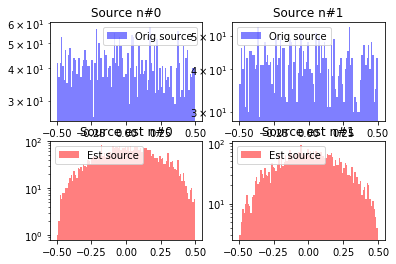

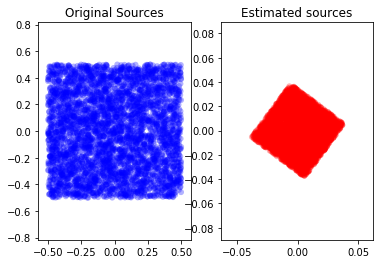

<Figure size 432x288 with 0 Axes>

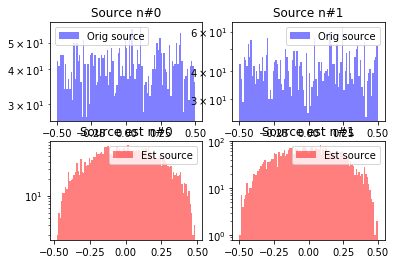

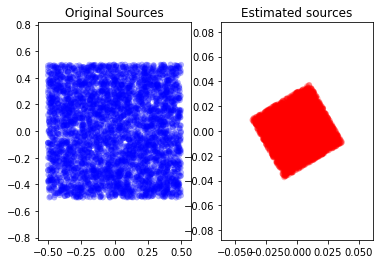

<Figure size 432x288 with 0 Axes>

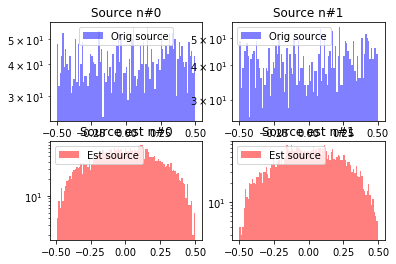

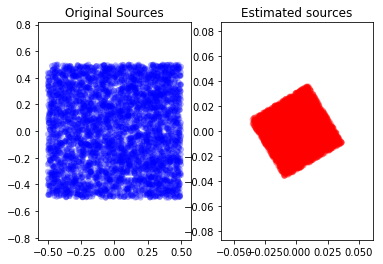

<Figure size 432x288 with 0 Axes>

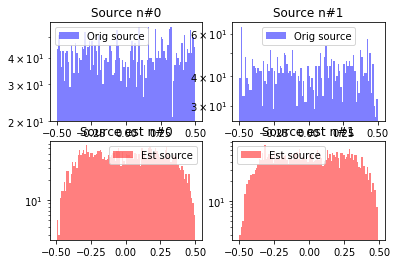

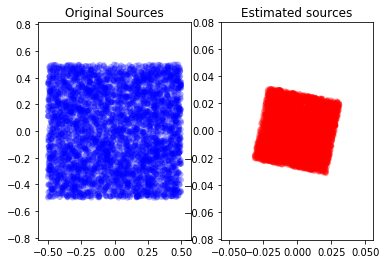

<Figure size 432x288 with 0 Axes>

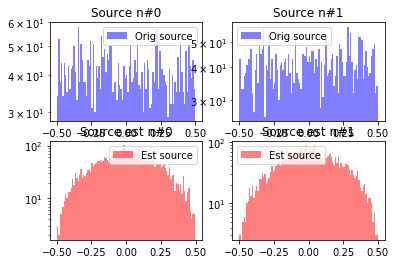

<Figure size 432x288 with 0 Axes>

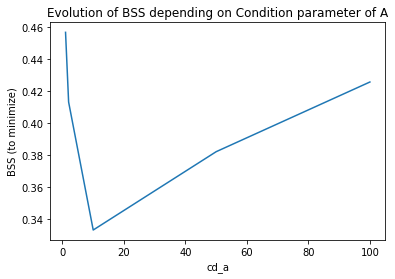

In [7]:
test_mult_fast_ica(cd_list=[1, 2, 10, 50, 100], nb_try=20)



Le dernier graphe, illustrant l'évolution du critère en fonction du nombre de conditionnement, est obtenu en moyennant 
cette valeur sur 20 estimation. Le graphe nous montre donc que les résultats et l'efficacité du ICA est dépendant 
de la valeur de conditionnement, et donc de la corrélation entre les sources. Cela peut être considéré comme une majeur 
limite de l'algorithme, car nous souhaiterions qu'ils soient efficace quelles que soient les sources et leurs 
corrélation, d'autant plus quand les données ont été décorrélées par whitening.



### Chandra data

Finalement, nous décidons de tester le ICA sur un dataset de données réelles, fournies dans le fichier ChandraSims.mat, 
qui sont des données simulées d'observations aux rayons X. Ces données sont composées de 8 sources. Les résultats de la 
séparation de sources est montré dans les figures ci-dessous.


In [8]:

test_fast_ica_chandra()


Loading mat
Mean squared error between mixing and estimated mixing = 0.000


c:\program files\python36\lib\site-packages\sklearn\decomposition\fastica_.py:299: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn('Ignoring n_components with whiten=False.')



Le ICA semble ne pas arriver à obtenir une bonne séarations des données. Néanmoins, en regardant la forme des sources
estimées, on peut observer des similitudes, dans la forme, avec les sources réelles. Nous nous retrouvons donc avec une
situation similaire à celle des sources uniformes : la corrélation entre les sources n'est pas respectée, et ainsi 
l'estimation est mitigée.



## 3. Sparse blind sources separation - GMCA

Dans un premier temps, nous essayons le dernier algorithme de ce TP, le GMCA, sur deux sources uniformes.


Mean squared error between mixing and estimated mixing = 0.000


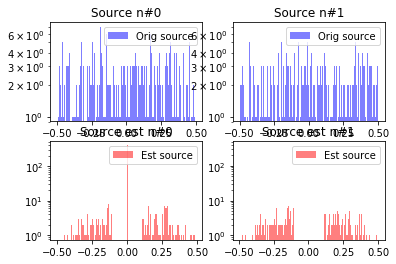

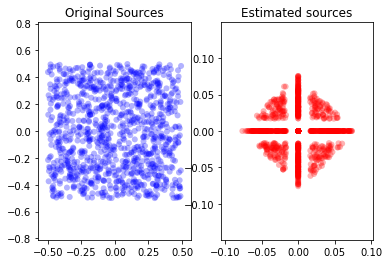

In [9]:

test_gmca_unif()



Le résultat obtenu peut sembler surprenant à première vue, mais le résultat est assez logique. En effet, le GMCA essaie
d'obtenir des sources qui soient parcimonieuses. L'optimisation se fait donc en minimisant l'erreur d'estimation et 
la parcimonie des sources obtenues. Le meilleur compromis dans ce cas-là est alors de faire tourner le carré de 45°, 
afin que la valeur centrale de chaque source puisse êtr maximal, ce qui maximise la parcimonie. Les valeurs autour de 
cette valeur centrale sont alors nulles, ce qui maximise la parcimonie, et ne diminue que faiblement la justesse de 
l'estimation.

On se retrouve alors, dans le cas de sources homogènes (et donc pas parcimonieuses du tout) avec cette forme 
particulière, qui minimise l'erreur d'estimaton et maximise la parcimonie.

Puisque le GMCA est adapté aux sources parcimonieuses, nous allons l'appliquer sur des sources qui sont quasi 
parcimonieuses, et observer son efficacité dessus. Pour cela, le code fourni permet de générer une mixture de sources 
quasi parcimonieuses. Les résultats sont montrés sur les figures ci-dessous.


Mean squared error between mixing and estimated mixing = 0.000


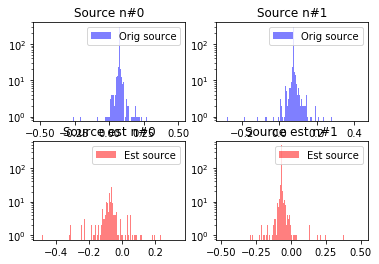

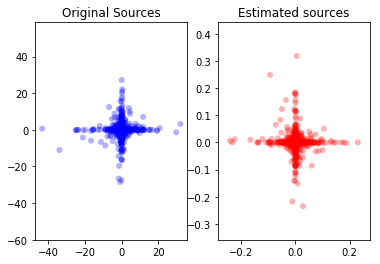

In [3]:

test_gmca_sparse()



On observe ici des résultats très satisfaisants, puisque les sources estimées sont les mêmes que les sources originales,
et la corrélation entre elles est de même respectée. On va ensuite pouvoir tester ce qui arrive dans le cas de 
données quasi sparse bruitées, avec plus ou moins de niveau de bruit. On teste pour cela des PSNR de 40 à 10 dB. On 
compare alors les résultats avec ceux obtenus sur les mêmes données par le ICA.

Comme précédemment, pour évaluer l'efficacité de l'algorithme, on va utiliser le 'Mixing Matrix Criterion', qu'on 
obtiendra en moyennant les résultats de 20 estimations. Les résultats sont montrés ci-dessous.


----- Noise = 40 -----
MSE between mixing and estimated mixing:
	GMCA : 	0.000
	Fast ICA : 	0.001
Mixing Matrix Criterion:
	GMCA : 	0.019
	Fast ICA : 	6.680

----- Noise = 30 -----
MSE between mixing and estimated mixing:
	GMCA : 	0.000
	Fast ICA : 	0.001
Mixing Matrix Criterion:
	GMCA : 	0.020
	Fast ICA : 	9.652

----- Noise = 20 -----
MSE between mixing and estimated mixing:
	GMCA : 	0.000
	Fast ICA : 	0.000
Mixing Matrix Criterion:
	GMCA : 	0.022
	Fast ICA : 	8.011

----- Noise = 10 -----
MSE between mixing and estimated mixing:
	GMCA : 	0.000
	Fast ICA : 	0.002
Mixing Matrix Criterion:
	GMCA : 	0.021
	Fast ICA : 	9.885



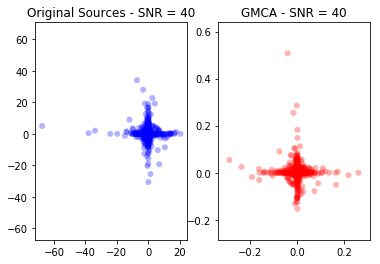

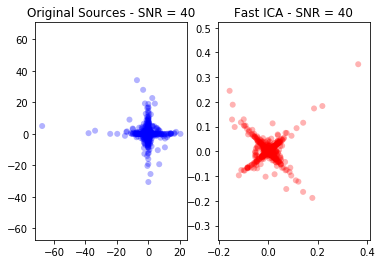

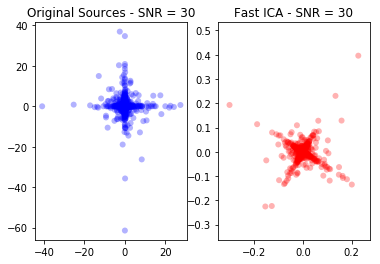

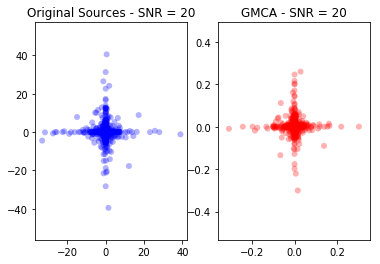

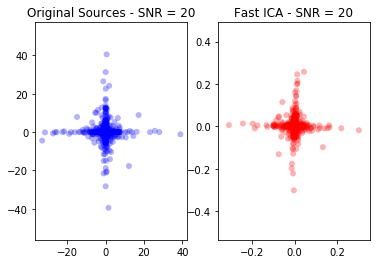

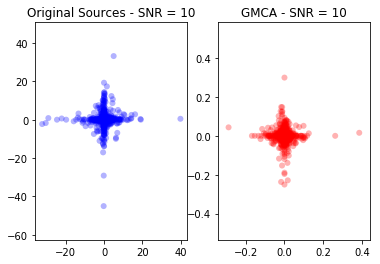

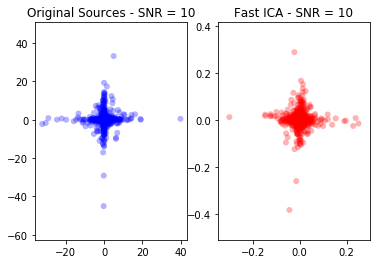

In [4]:

test_gmca_ica_mult_noise(noise_list=[40, 30, 20, 10], nb_essais=20)



Comme précédemment, le GMCA montre des résultats bien meilleurs que le ICA. Notammenet, le ICA perd systématiquement 
la corrélation entre les sources, tandis que le GMCA, quel que soit le niveuau du bruit, garde l'orientation.

Le GMCA est aussi très robuste au bruit. Cela peut toujours s'interpréter comme un effet de la maximisation de la 
parcimoie qui est imposée par la formule d'optimisation.



## Conclusion

Ce TP a été l'occasion d'appliquer plusieurs algorithmes de séparation de sources, appliqués sur divers exemples, 
synthétiques et pseudo réels (simulation d'un phénomène physique).

Deux algorithmes surtout ont été comparés, le ICA (Independant Component Analysis) et le GMCA. Le premier, si il 
présente des résultats plutôt correct, trouve toujours des sources corrélées là où elles ne le sont pas, sur les cas de
sources uniformes testées.

Le GMCA quant à lui, offre de très bons résultats sur des sources parcimonieuses, grâce à sa structure qui tente 
d'optimiser à la fois la distance aux données d'origine ainsi que la parcimonie des sources. Néanmoins, cela présente 
des défaut sur des sources non-parcimonieuses, où le GMCA va forcer dans l'estimation une parcimonie absente des données
originales.